In [8]:
import sys
import numpy as np
import cv2
import pandas as pd
import os
import matplotlib.pyplot as plt
sys.path.append('../scripts/')
from labels_metrics import *

MESSIDOR_FOLDER = '/home/travail/clement/messidor/'
ROOT_GT = os.path.join(MESSIDOR_FOLDER, 'labelId')

In [2]:
list_mask = [os.path.join(ROOT_GT, f) for f in os.listdir(ROOT_GT)]
labels_table = pd.read_csv('../labels_hash.csv')
labels_table

,Unnamed: 0,name,id,path
0,0,Non ROI,0,NaN
1,1,Vessels,1,Vessels/Vessels - Uncertain
2,2,Optic disk,2,Normal/Disk
3,3,Optic cup,3,Normal/Cup
4,4,Macula,4,Normal/Macula
5,5,Cotton Wool Spot,5,Bright/Cotton Wool Spots/
6,6,Drusen,6,Bright/Drusen/
7,7,Exudates,7,Bright/Exudates/
8,8,Hemorrages,8,Red/Hemorrhages/
9,9,Neovascularizations,9,Red/Neovascularization


In [3]:
labels_name = np.asarray(labels_table.name)
df = get_stats_from_folder_masks(ROOT_GT, len(labels_name), labels=labels_name)

  0%|          | 0/200 [00:00<?, ?it/s]/usagers/clpla/.conda/envs/clement/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usagers/clpla/.conda/envs/clement/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 200/200 [00:50<00:00,  3.97it/s]


In [4]:
df

Name Non ROI              Vessels               \
                                 Number Average area  Number Average area   
0    20060411_58238_0200_PP.png       5      96525.4      13      19143.1   
1    20060530_54718_0100_PP.png       5      97485.8      10      21029.2   
2    20060412_61251_0200_PP.png       2       243070      11      22524.5   
3    20060523_50489_0100_PP.png       1       487293      29         6101   
4    20060530_55180_0100_PP.png       4       121752      22      12442.7   
..                          ...     ...          ...     ...          ...   
195  20051019_38557_0100_PP.png       1       487004      30      8297.33   
196  20060522_45248_0100_PP.png       4       121968      14      19926.5   
197  20060523_45369_0100_PP.png       1       486597      18      14697.9   
198  20060412_58723_0200_PP.png       2       244818      13      21827.2   
199  20051208_41318_0400_PP.png       9      52713.9      28      6884.39   

    Optic disk              Optic cup              Macula  ...  \
        Number Average area    Number Average area Number  ...   
0            1        27569         1         8512      1  ...   
1            1        30145         1         7603      1  ...   
2            1        29119         1          531      1  ...   
3            1        42110         1          230      1  ...   
4            1        19835         2       3254.5      1  ...   
..         ...          ...       ...          ...    ...  ...   
195          1        34121         1         4915      1  ...   
196          1        29066         1         6739      1  ...   
197          1        26068         1         9609      1  ...   
198          1        37038         0          NaN      1  ...   
199          1        24031         1         8952      1  ...   

    Subretinal hemorrhages              Microaneurysms               \
                    Number Average area         Number Average area   
0                        0          NaN             36      123.333   
1                        0          NaN              8      103.625   
2                        0          NaN             25       135.92   
3                        0          NaN            101      151.119   
4                        0          NaN              0          NaN   
..                     ...          ...            ...          ...   
195                      0          NaN             22        153.5   
196                      0          NaN             60      102.583   
197                      0          NaN             40          107   
198                      0          NaN              2         74.5   
199                      0          NaN             33      181.152   

    Uncertain-red              Uncertain-bright              Retina  \
           Number Average area           Number Average area Number   
0               0          NaN                0          NaN     31   
1               0          NaN                0          NaN     29   
2               0          NaN                1           95     35   
3               0          NaN                0          NaN     37   
4               0          NaN                0          NaN     48   
..            ...          ...              ...          ...    ...   
195             0          NaN                1          112     63   
196             0          NaN                0          NaN     62   
197             0          NaN                2           77     48   
198             0          NaN                0          NaN     58   
199             0          NaN                1         1218     35   

                  
    Average area  
0        47468.9  
1        52111.2  
2        42316.7  
3        38228.6  
4        30438.1  
..           ...  
195        23030  
196      23055.7  
197      30296.3  
198      24790.7  
199      43435.8  

[200 rows x 33 columns]

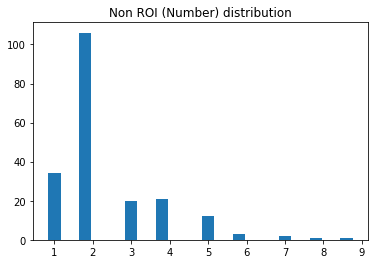

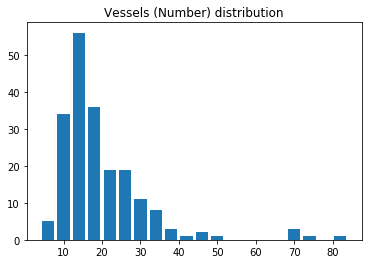

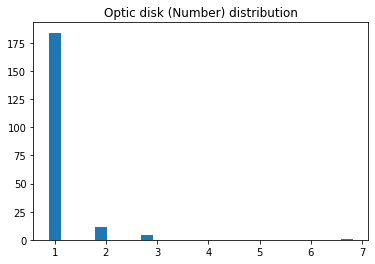

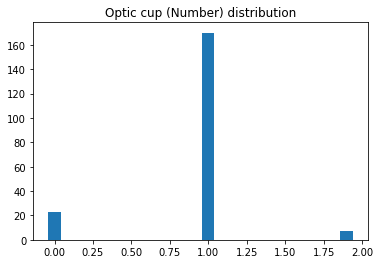

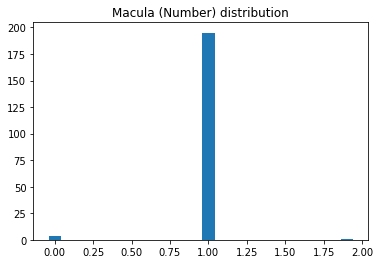

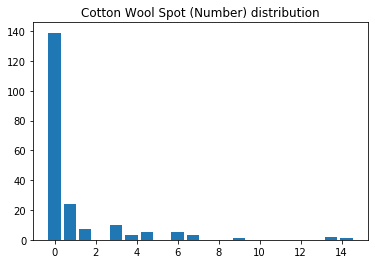

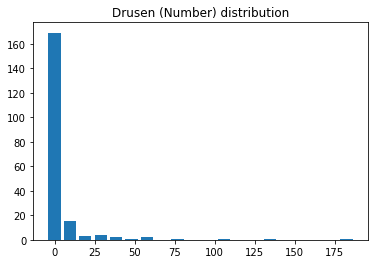

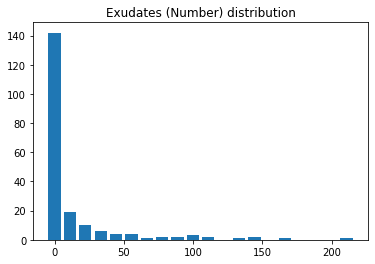

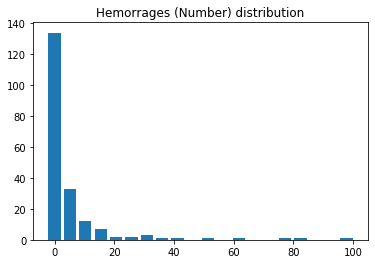

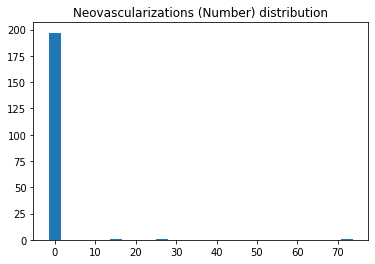

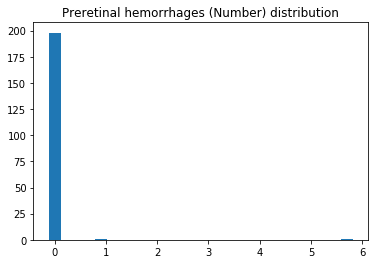

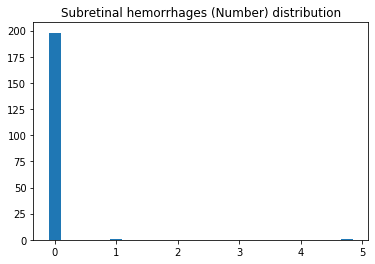

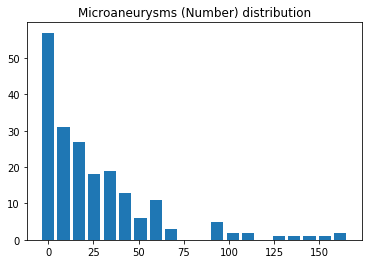

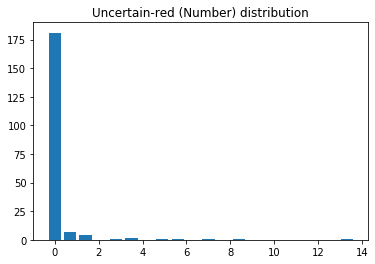

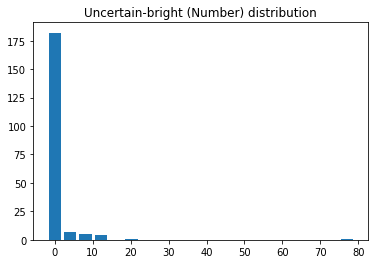

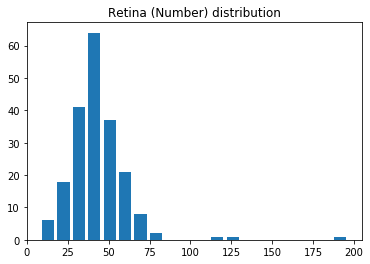

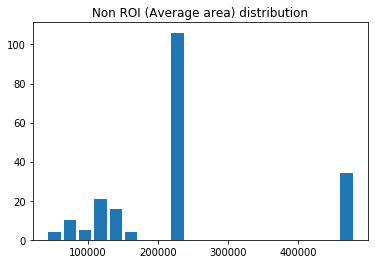

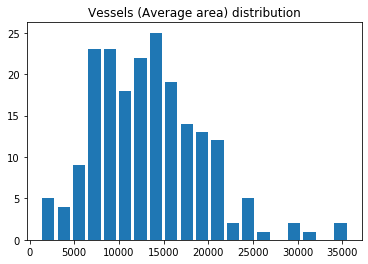

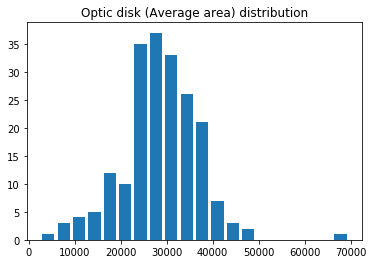

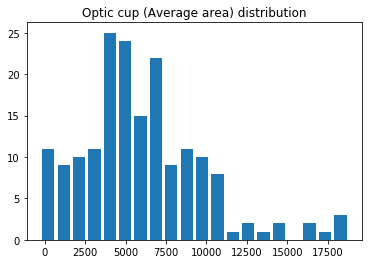

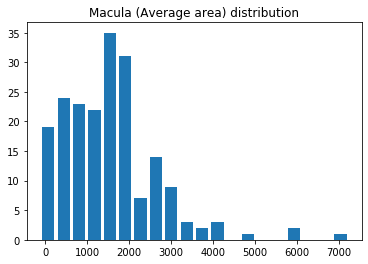

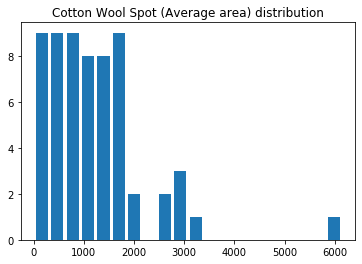

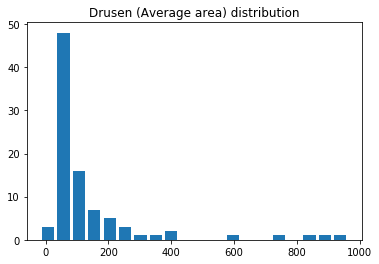

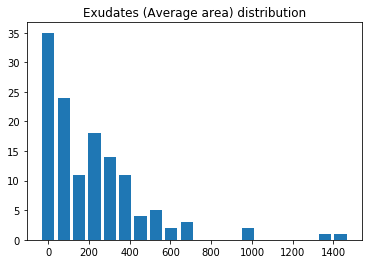

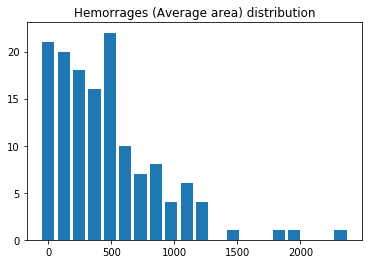

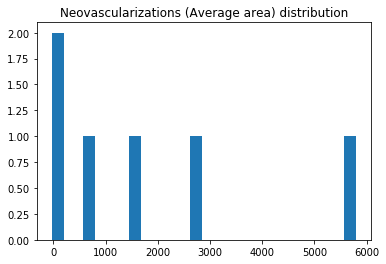

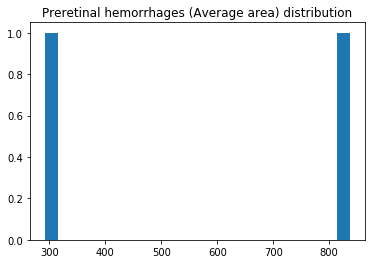

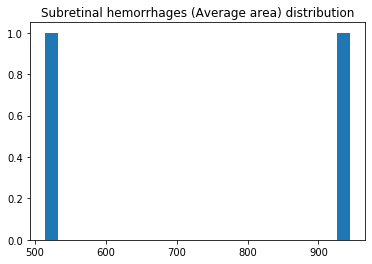

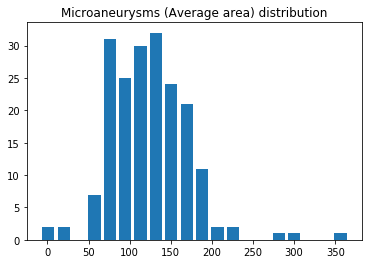

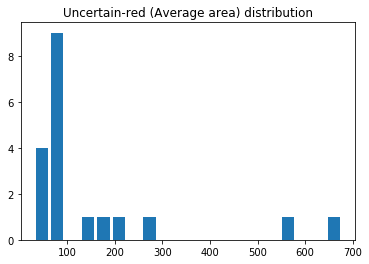

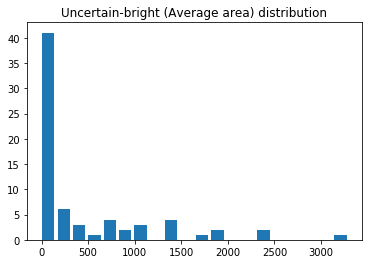

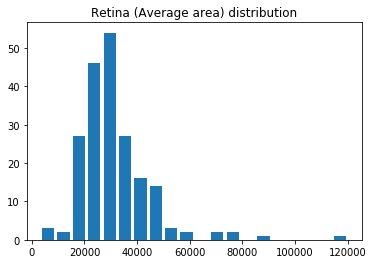

In [38]:
df.to_csv('messidor_stats.csv')
def plot_structures_histogram(structure, stat='Number'):
    nb_per_image = df[(structure, stat)]
    plt.hist(nb_per_image, bins=20, rwidth=.8, align='left')
    plt.title('%s (%s) distribution'%(structure, stat) )
    plt.show()
    
for l in labels_name:
    plot_structures_histogram(l)

for l in labels_name:
    plot_structures_histogram(l, 'Average area')